#### making data

In [2]:
import pandas as pd

# Define the dataset
data = {
    'shivers': ['Y', 'N', 'Y', 'N', 'N', 'Y', 'Y'],
    'running nose': ['N', 'N', 'Y', 'Y', 'N', 'N', 'Y'],
    'headache': ['No', 'Mild', 'No', 'No', 'Heavy', 'No', 'Mild'],
    'test result': ['Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive']
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

#### Explain why it is not useful to include the column 'Roommate' in a classification procedure.
Including the 'Roommate' column in a classification procedure is not useful because it represents an identifier or label assigned to each student and does not provide any meaningful information related to the classification task at hand, which is predicting the test results based on the symptoms experienced by the roommates. The 'Roommate' column is unique for each student and does not contribute to the understanding or prediction of the test results.

#### preparing data

In [3]:
from sklearn.naive_bayes import CategoricalNB

# Converting categorical variables to binary features
df_encoded = pd.get_dummies(df.drop('test result', axis=1))

# Creating the target variable
target = df['test result']

# Training the Categorical Naive Bayes classifier
nb_classifier = CategoricalNB()
nb_classifier.fit(df_encoded, target)

CategoricalNB()

#### predicting

In [5]:
# Manually calculating the prediction probabilities for observation 5
observation_5 = df_encoded.iloc[4]  # 0-based index, corresponds to 5 in 1-based index
prediction_probabilities = nb_classifier.predict_proba([observation_5])

# Display the prediction probabilities
print(f'Prediction probabilities: {prediction_probabilities}')

Prediction probabilities: [[0.59814107 0.40185893]]


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


#### visualizing the results

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pylab as plt

# Make predictions on the entire dataset
predictions = nb_classifier.predict(df_encoded)

# Create a confusion matrix
confusion_mat = confusion_matrix(target, predictions)


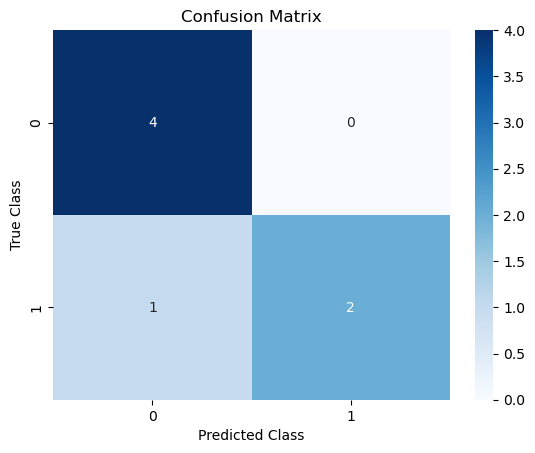

Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      1.00      0.89         4
    Positive       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



In [8]:
# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

# Create a classification report
report = classification_report(target, predictions)

# Display the classification report
print('Classification Report:')
print(report)